<a href="https://colab.research.google.com/github/mahshadmoradi/Machine-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enter Student Name & ID

In [ ]:
student_id =  400109373 #@param {type:"integer"}
student_name = "Mahshad Moradi" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400109373
your name: Mahshad Moradi


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [1]:
import numpy as np

In [27]:
def myPCA(X, num_components):

    X_centered = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # sort eigenvectors by eigenvalues in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose(), X_centered.transpose()).transpose()

    return X_reduced

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [5]:
import matplotlib.pyplot as plt # modified it for easier use in plotting
from sklearn.datasets import load_iris

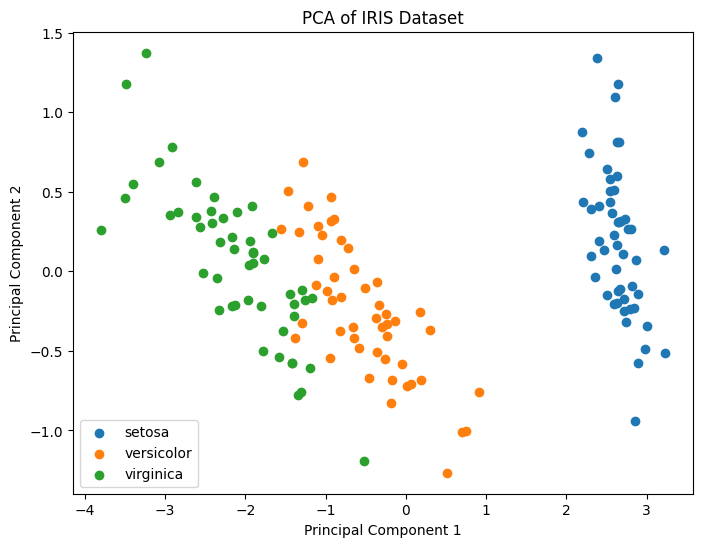

In [28]:
# myPCA on IRIS

# the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

X_reduced = myPCA(X, 2)

plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], label=iris.target_names[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend()
plt.show()

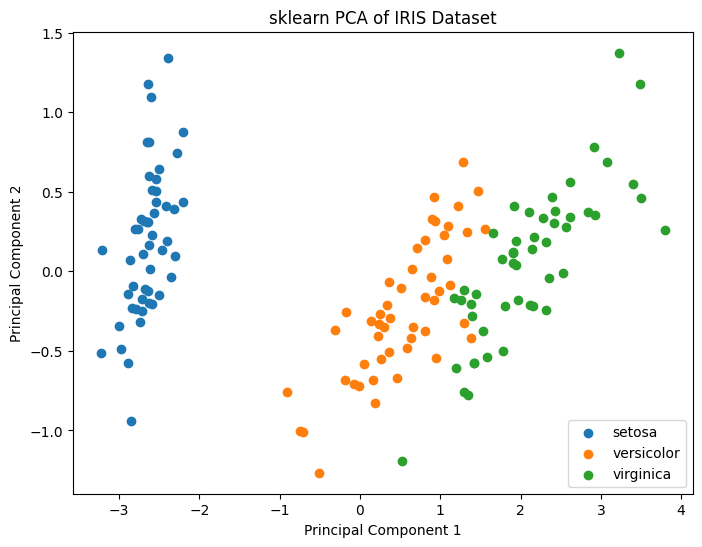

In [31]:
# for comparison with sklearn

pca = PCA(n_components=2)
X_reduced_sklearn = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.scatter(X_reduced_sklearn[y == i, 0], X_reduced_sklearn[y == i, 1], label=iris.target_names[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('sklearn PCA of IRIS Dataset')
plt.legend()
plt.show()

Which shows that they match.

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `


Eigenfaces are a set of eigenvectors used in face recognition, derived from the covariance matrix of a set of training face images. They represent the principal components of these images, capturing the most significant features. In PCA, eigenfaces are used to reduce the dimensionality of face images, transforming high-dimensional data into a lower-dimensional subspace while retaining essential information for recognizing faces.

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [ ]:
import zipfile

# extract the zip file
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# extract the dataset
zip_path = '/content/FacesDataset1.zip'
extract_to = 'faces_dataset'
extract_zip(zip_path, extract_to)

In [7]:
import cv2
import os

def load_dataset(dataset_path):
    X = []
    y = []
    for person_folder in os.listdir(dataset_path):
        person_folder_path = os.path.join(dataset_path, person_folder)
        if os.path.isdir(person_folder_path):
            for image_name in os.listdir(person_folder_path):
                if image_name.endswith('.bmp'):
                    image_path = os.path.join(person_folder_path, image_name)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image_flatten = image.flatten()
                    X.append(image_flatten)
                    y.append(int(person_folder[1:]))  # folder names are 's1', 's2', ...
    return np.array(X), np.array(y)

# Load the dataset
orl_path = '/content/faces_dataset/ORL'
X_faces, y_faces = load_dataset(orl_path)

In [8]:
from sklearn.model_selection import train_test_split

def split_dataset(X, y):
    X_train, X_test, y_train, y_test = [], [], [], []
    for person_id in np.unique(y):
        person_images = X[y == person_id]
        X_train.extend(person_images[:5]) # first 5 for train
        X_test.extend(person_images[5:]) # other 5 for test
        y_train.extend([person_id] * 5)
        y_test.extend([person_id] * 5)
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Split the dataset
X_train_faces, X_test_faces, y_train_faces, y_test_faces = split_dataset(X_faces, y_faces)

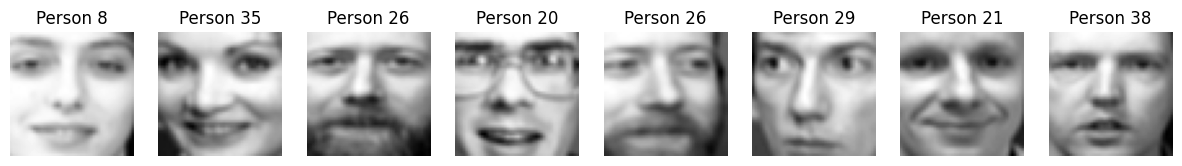

In [22]:
# Random faces from train dataset
def plot_faces(images, labels, num_images=8):
    plt.figure(figsize=(15, 3))
    indices = np.random.choice(range(len(images)), num_images, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx].reshape(48, 48), cmap='gray')
        plt.title(f'Person {labels[idx]}')
        plt.axis('off')
    plt.show()

# Plot first few training images
plot_faces(X_train_faces, y_train_faces)

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [16]:
from sklearn.decomposition import PCA

# Apply PCA on faces dataset
num_components = 50

# # with myPCA
# X_train_faces_reduced = myPCA(X_train_faces, num_components)
# X_test_faces_reduced = myPCA(X_test_faces, num_components)

pca = PCA(n_components=num_components)
X_train_faces_reduced = pca.fit_transform(X_train_faces)
X_test_faces_reduced = pca.transform(X_test_faces)

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [17]:
# Train LDA classifier
lda = LDA()
lda.fit(X_train_faces_reduced, y_train_faces)

# Predict and calculate accuracy
y_pred = lda.predict(X_test_faces_reduced)
accuracy = accuracy_score(y_test_faces, y_pred)
print(f'LDA Classifier Accuracy: {accuracy * 100:.2f}%')

LDA Classifier Accuracy: 95.50%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [19]:
for components in range(40, 101, 10):

    pca = PCA(n_components=components)
    X_train_faces_reduced = pca.fit_transform(X_train_faces)
    X_test_faces_reduced = pca.transform(X_test_faces)

    # X_train_faces_reduced = myPCA(X_train_faces, components)
    # X_test_faces_reduced = myPCA(X_test_faces, components)

    lda.fit(X_train_faces_reduced, y_train_faces)
    y_pred = lda.predict(X_test_faces_reduced)
    accuracy = accuracy_score(y_test_faces, y_pred)
    print(f'PCA Components: {components}, Accuracy: {accuracy * 100:.2f}%')

PCA Components: 40, Accuracy: 94.50%
PCA Components: 50, Accuracy: 95.50%
PCA Components: 60, Accuracy: 96.00%
PCA Components: 70, Accuracy: 95.50%
PCA Components: 80, Accuracy: 94.00%
PCA Components: 90, Accuracy: 95.00%
PCA Components: 100, Accuracy: 94.50%


Based on the results of varying the PCA components, it appears that using around 60 components is sufficient to achieve the highest accuracy of 96.00%. Beyond this number, the accuracy does not significantly improve and even fluctuates. Therefore, 60 components strike a balance between dimensionality reduction and maintaining high classification accuracy.